In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from collections import Counter
from wordcloud import WordCloud

plt.rc('font', family='Malgun Gothic')
font_path = r"C:/windows/fonts/malgun.ttf"

In [2]:
# for colab
"""!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!cd Mecab-ko-for-Google-Colab
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh
"""

'!pip install konlpy\n!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git\n!cd Mecab-ko-for-Google-Colab\n!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh\n'

In [20]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [63]:
yymm = "2308"

file_path = '../data/'  # 파일 경로를 지정하세요
fn= f'epic_metadata_{yymm}.xlsx'

df = pd.read_excel(file_path+fn)

In [64]:
df.head()

,Unnamed: 0,자료명,발간일,발간처,요약
0,241370,건설정보 모델링(BIM) 설계 최적화 본격 시행,2023.07.31,조달청,조달청은 ‘복합과학체험랜드 조성사업’ 설계공모 당선작을 시작으로 건설정보모델링(BI...
1,241371,"조달청, 8월 대형사업 총 164건, 3조 4,280억 원 상당 입찰 예정",2023.08.01,조달청,"조달청은 8.1.(화) ‘서울교통공사 5, 7호선 신조 전동차(216칸)구매’를 포..."
2,241372,“청년의 시각에서”… 공공조달에 변화의 바람을 불어넣다,2023.08.01,조달청,조달청은 ‘조달청 청년 정책 자문단’ 출범식을 갖고 본격 운영에 돌입했다고 8.1....
3,241373,2023년 6월 온라인쇼핑동향,2023.08.01,통계청,통계청은 2023년 6월 온라인쇼핑동향을 8.1.(화) 발표하였다.\n\n- 6월 ...
4,241375,"복잡한 법인세 중간예납 신고, 클릭 몇 번으로 끝!",2023.07.31,국세청,"국세청은 12월 결산법인은 8.31.(목)까지 법인세 중간예납을 신고납부해야 하며,..."


In [65]:
df_moef = df[df['발간처'].str.contains("기획재정부")]
df_mafra = df[df['발간처'].str.contains("농림축산식품부")]
df_fsc = df[df['발간처'].str.contains("금융위원회|금융감독원")]
df_msit = df[df['발간처'].str.contains("과학기술정보통신부")]
df_motie = df[df['발간처'].str.contains("산업통상자원부")]

In [66]:
stop_words = "안 간 붙임 참고 참조 첨부 총리 장관 겸 청 실 는 은 가 등 원 조 개 이 저 다만 하지만 그러나 중 억 년 월 화 수 목 금 토 일 것 줄 만 건 또한 아울러 그리고 전년 금년 이번 올해 내년 기획 재정부 첨부 파일 내용 발표 위원회 감독원 부"
stop_words = stop_words.split(" ")

In [67]:
excluson = ["기획재정부","정부",'과학기술정보통신부','과기정통부','농림축산식품부','농식품부','금융위원회','금융위','금융감독원','금감원','산업통상자원부','산업부',
            '환경부','해양수산부','해수부','공정거래위원회','공정위','식약처','식품의약품안전처','고용노동부','고용부','국토교통부','국토부','중소기업벤처부','중기부',
            '통계청','국세청','관세청','조달청','특허청','통일부','보건복지부','복지부','교육부','한국은행',
            '계획임.','예정임.','밝혔다.','발표하였다.']

In [68]:
def df_to_wordcloud(df, name, name_fn, yymm):
    summary_list = df['요약'].tolist()
    
    nouns = []
    for summary in summary_list:
        for ex in excluson:
            summary = summary.replace(ex,'')
        for noun in tagger.nouns(summary):
            if noun not in stop_words:
                nouns.append(noun)
    
    nouns_counter = Counter(nouns)
    top_nouns = dict(nouns_counter.most_common(100))
    
    wc = WordCloud(background_color='white', font_path=font_path)
    wc.generate_from_frequencies(top_nouns)
    
    figure = plt.figure()
    
    ax = figure.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(wc)
    
    plt.title(f"{name} {yymm}")
    plt.axis('off')
    plt.savefig(f"wordcloud_monthly/wordcloud_{name_fn}_{yymm}.png")
    plt.show()

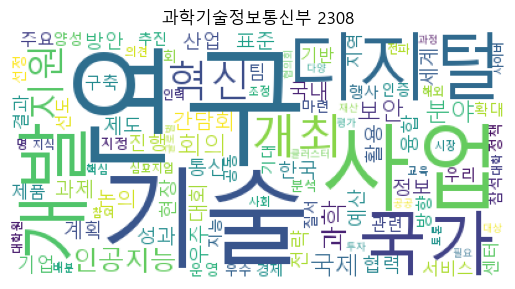

In [69]:
df = df_msit.copy()
name = '과학기술정보통신부'
name_fn = 'msit'

df_to_wordcloud(df, name, name_fn, yymm)